# Практическая работа №1: Исследование алгоритмов формирования аддитивных цепочек

Выполнил студент группы 9381 Авдеев Илья Вариант 45

## Цель работы:
Формирование представления о аддитивных цепочках, выработать умение составлять и применять алгоритмы для нахождения минимальных аддитивных цепочек для заданного числа, привить навык использования систем компьютерной алгебры для реализации алгоритмов.

## Основные теоретические положения.

### Бинарный метод

Один из методов быстрого возведения числа $x$ в степень $n \in N$. В методе степень записывается в двоичной системе счисления. Далее, самый левый (ненулевой) бит предварительно отсекается, после чего производится просмотр бит слева направо и над числом производится последовательность операций в зависимости от последовательности этих бит: 
- если бит равен нулю, то текущее  число возводится в квадрат;
- если бит равен единице, то текущее число возводится в квадрат и умножается на $x$.<br> 

Количество операций умножения в бинарном методе равно: $\lambda(n) + \nu(n) - 1$, где 
- $\lambda(n) = \lfloor log_2 n \rfloor$ - уменьшенная на 1 длина бинарной записи числа $n$;
- $\nu(n)$ - число ненулевых цифр в записи числа (количество единиц в бинарной записи числа).

### Метод множителей

Один из методов быстрого возведения числа $x$ в степень $n \in N$. 
Рассматриваются 2 случая:
1) Если число составное: число $n$ раскладывается на произведение чисел: $n = i\cdot j$, причём $i$ - минимальный простой множитель числа. После этого вычисляется $x^{i}$, затем результат возводится в степень $j$.
2) Если число простое: вычисляется $x^{n-1}$ (причём $n-1$ раскладывается на произведение чисел аналогично предыдущему пункту), затем результат умножается на $x$.

Пусть $m$ - количество операций, необходимых, чтобы вычислить $x^{i}$, a $f$ - количество операций, чтобы возвести $x^{i}$ в степень $j$, тогда количество операций в методе множителей $m + f$.

### Определение аддитивной цепочки.

Аддитивная цепочка для некоторого числа $n\in \mathbb{N}$ - это последовательность натуральных чисел $\{a_i\}_{i=0}^m$, принимающих значения от $1$ до $n$, в которой каждый элемент равен сумме каких-либо двух предыдущих. Свойства аддитивной цепочки:
1. $a_0 = 1,\dotso , a_m = n$;
2. $\forall i = 1\dotso m: a_i = a_j + a_k$, $k \leq j < i$;

$l(n)$ - минимальная длина аддитивной цепочки.

$\forall n \leq 1000$ справедлива рекурентная формула: $l(n) = min\{ l(n-1)+1, l_n\} - \delta_n$, где 
 $l_p = 
    \begin{cases} 
        \infty & \quad \text{, если p - простое число}  \\ 
        l(q) + l(\frac{p}{q}) & \quad \text{, если q - минимальный простой делитель числа p} 
     \end{cases}$
     
 $\delta_n\in\{0, 1\}$

### Теорема Брауера

Для некторого $k < log_2 log_2 n$ справедливо неравенство: $l(n) < (1+k^{-1})\cdot\lceil\log_2 n\rceil+2^{k-1}-k+2$

Следствия при $k = \lambda(\lambda(n))-2\lambda(\lambda(\lambda(n)))$:

Следствие 1: $\lim\limits_{x\to\infty} \cfrac{l(n)}{\lambda(n)} = 1$

Следствие 2: Наилучшая верхняя оценка для l(n) имеет вид: $\lambda(n)(1+\cfrac{1}{\lambda(\lambda(n))}+\cfrac{o(\lambda(\lambda(\lambda(n))))}{(\lambda(\lambda(n)))^2})$

### Типы шагов аддитивной цепочки

$a_i=a_j+a_k$ - шаг аддитивной цепочки, $i \in \{1,\dotso,m\}$, $0\leq k\leq j < i$

Типы шагов:
1) Удвоение, если $j=k=i-1$, то есть $a_i = 2 \cdot a_{i-1}$;<br>
2) Звёздный, если $j = i-1$, $k = \{0,1,\dotso,{i-1}$\};<br>
3) Малый, если $\lambda(a_i) = \lambda(a_{i-1})$

### Алгоритм Брауера

Алгоритм Брауера вычисляет n нную стпенень за $\lambda(n)+\frac{(1+o(1))\lambda(n)}{\lambda(\lambda(n))}$ операций.

Для некоторых n, k Брауерские цепочки задаются в виде рекурентной формулы: $B_k(n) =\begin{cases}1, 2, 3, ..., 2^k-1\text{, если } n<2^k \\ B_k(q), 2q, 4q, 8q, ..., 2^kq, n,\text{ если } n \geqslant 2^k\ \text{и } q = \lfloor\frac{n}{2^k}\rfloor \end{cases}$

Сам алгоритм следующий:

Даны числа n, k.
1. Вычисляются вспомогательные числа. ${d := 2^k, q_1 = \left [ \frac{n}{d} \right ], r_1 = n \% d}$, то есть ${n = q_1 d + r_1, 0 \leq r_1 < d}$
2. Далее считаем: ${q_i = \left [ \frac{q_{i-1}}{d} \right ], r_i = q_{i-1} \%d \Leftrightarrow q_{i-1} = q_i d + r_i}$
3. До тех пор, пока не получится ${q_s < d \Rightarrow q_{s-1} = q_s d + r_s}$ 

В итоге получим: ${n = 2^k q_1 + r_1 = 2^k(2^k q_2 + r_2) + r_1 = ... = 2^k(2^k(...(2^kq_s + r_s)...) + r_2) + r_1}$

После этого возьмем тривиальную Брауэровскую цепочку ${B_k(n) = 1, 2, 3, ..., 2^k -1}$ и будем ее дополнять:
${B_k(n) = 1, 2, 3, ..., 2^k - 1, 2q_s, 4q_s, 8q_s,..., 2^k q_s, 2^k q_s + r_s, ..., n}$

### Звёздная цепочка.

Звездная цепочка - это аддитивная цепочка, которая содержит только звёздные шаги, т.е. $a_i=a_{i-1}+a_k$, где $0 \leq k \leq i-1$

### Гипотеза Шольца-Брауэра.

$l^*(2^n-1) \leq l(n)^*+n-1$
,где $l^*(n)$ - длина некоторой звёздной цепочки, $l^*(n) \geq l(n)$<br>


### Алгоритм дробления вектора индексов

Алгоритм дробления вектора индексов находит минимальную звездную цепочку для некоторого числа $n \in \mathbb{N}$. 

Дана звездная цепочка длины ${l(n) = m-1}$.
Тогда для каждой такой звездной цепочки можно задать вектор индексов вида ${\left \{ r_1, r_2, ..., r_{m-1} \right \} : r_i = \left\{x: 1 \leq x \leq i\right\}}$. Тогда можно записать шаг в виде ${a_i = a_{i-1} + a_{r_{i-1}}}$.

Рассмотрим вектор индексов $\{r_i\}_{i=1}^q \cup {\{{\rho}_j \}}_{j=q+1}^m$, где ${\rho}_j= \{x: 1 \leq x \leq j \}$, ${\{r_i\}}_{i=1}^q$ - фиксированная часть, ${\{{\rho}_j\}}_{j=q+1}^m$ - изменяющаяся часть.

Максимальное значение $a_m$ достигается при векторе индексов ${\{r_i\}}_{i=1}^{q} \cup \{q+1,q+2,\dots,m\}$.

Минимальное значение $a_m$ достигается при векторе индексов ${\{r_i\}}_{i=1}^{q}\cup\{1,1,\dots,1\}$.

Зная $a_{q+1}$ можно найти $a_{min}$ и $a_{max}$:

$a_{max} = a_{q+1} \cdot {2}^{m-q}$

$a_{min} = a_{q+1}+m-q$

Алгоритм дробления ВИ:
1. Длина минимальной звездной цепочки $l(n)$ будет находиться на отрезке $\underline{l}(n) \leq l(n) \leq \overline{l}(n)$, где $\underline{l}(n) = \lceil lb(n) \rceil$, а  $\overline{l}(n) = \lambda(n) + \nu(n) - 1$ , на каждой итерации выбираем $q$ ($1 \leq q \leq m-1$);
2. Далее перебираем все возможные фиксированные части вектора индексов $\{r_i\}_{i=1}^q$ ($(q - 1)!$ вариантов), для каждой строим соответствующую ей звездную цепочку, находим $a_{max}$ и ${a}_{min}$, после чего:
 1. Если $a_m=n$, то цепочка найдена;
 2. Если $n\in [a_{min},a_{max}]$, то перебираем все возможные изменяющиеся части вектора индексов ${\{{\rho}_j\}}_{j=q+1}^m$ и находим $a_m$:
  1. Если $n \notin [a_{min},a_{max}]$, то переходим к следующему набору $\{r_i\}_{i=1}^q$;
  2. Если все возможные изменяющиеся части вектора индексов ${\{{\rho}_j\}}_{j=q+1}^m$ исчерпаны, то переходим к новому вектору $\{r_i\}_{i=1}^q$;
3. Если все наборы вектора индексов длины $m$ исчерпаны, то увеличиваем $m$ на 1 и возвращаемся к пункту 2.

## Постановка задачи
Реализовать точные и приближённые алгоритмы нахождения минимальных аддитивных цепочек с использованием системы компьютерной алгебры SageMath, провести анализ алгоритмов. Полученные результаты содержательно проинтерпретировать.

### Порядок выполнения работы

1. Применить бинарный метод и метод множителей для $x^n$,где $n \geqslant 30$, для 2-3 значений $n$(значения $n$ выбирается студентом самостоятельно). Сравнить количество операций для каждого метода, сделать выводы.
2. Реализовать алгоритм Брауэра для вычисления приближённых аддитивных цепочек для различных чисел при варьировании параметра $k$, сопоставить длины полученных аддитивных цепочек с минимальной аддитивной цепочкой для заданного числа. Сделать выводы.
3. Реализовать алгоритм дробления вектора индексов для нахождения минимальной звёздной цепочки для заданного числа. Протестировать алгоритм при $n \geqslant 500$. Указать, сколько времени потребовалось на поиск цепочки и какая цепочка получилась. Сравнить с предыдущими методами, сделать выводы.
4. Проверить следствие 1 теоремы Брауэра для $n=1..200$ путём построения функции $l(n)$ и аппроксимирующей кривой, полученной с помощью метода наименьших квадратов. Сопоставить функции на одном графике, сделать выводы.
5. Проверить гипотезу Шольца–Брауэра для $1\leqslant n \leqslant 10$ на алгоритме дробления вектора индексов. Сделать выводы.
6. _Дополнительное необязательное задание: найти и/или предложить модификации алгоритмов и привести описание модификаций. Реализовать модифицированные алгоритмы и сравнить их мощность_

## Выполнение работы
### Решение задач вычисления степеней бинарным методом и методом множителей

#### Возведение числа x в степень n=52:

**Бинарный метод:**

$52_{10} = 110100_2$

$x,\ x^2,\ x^2\cdot x = x^3,\ (x^3)^2 = x^6,\ (x^6)^2 = x^{12},\ x^{12}\cdot x = x^{13},\ (x^{13})^2 = x^{26}, \ (x^{26})^2 = x^{52}$ - 7 операций

**Метод множителей:**

$52 = 4\cdot 13$.

$x^{52} = {(x^4)}^{13}$

$4_{10} = 100_2$ , $13_{10} = 1101_2$

$x,\ x^2\ (x^2)^2 = x^4$ - 2 операции

$y,\ y^2,\ y^2\cdot y = y^3,\ (y^3)^2 = y^6,\ (y^6)^2 = y^{12},\ y^{12}\cdot y = y^{13}$ - 5 операций

Итого: 7 операций

#### Возведение числа x в степень n=40:

**Бинарный метод:**

$40_{10} = 101000_2$

$x,\ x^2,\ (x^2)^2 = x^4,\ x^4\cdot x = x^5,\ (x^5)^2 = x^{10},\ (x^{10})^2 = x^{20},\  (x^{20})^2 = x^{40}$ - 6 операций

**Метод множителей:**

$40 = 5\cdot 8$.

$x^{40} = {(x^5)}^8$

$5_{10} = 101_2$ , $8_{10} = 1000_2$

$x,\ x^2,\ (x^2)^2 = x^4,\ x^4\cdot x = x^5$ - 3 операции

$y,\ y^2,\ (y^2)^2 = y^4,\ (y^4)^2 = y^8$ - 3 операции

Итого: 6 - операций

#### Возведение числа x в степень n=65:

**Бинарный метод:**

$65_{10} = 1000001_2$

$x,\ x^2,\ (x^2)^2 = x^4,\ (x^4)^2 = x^8,\ (x^8)^2 = x^{16},\ (x^{16})^2 = x^{32},\ (x^{32})^2 = x^{64}, x^{64}\cdot x = x^{65}$ - 7 операций

**Метод множителей:**

$65 = 5\cdot 13$.

$x^{65} = {(x^5)}^{13}$

$5_{10} = 101_2$, $13_{10} = 1101_2$

$x,\ x^2,\ (x^2)^2 = x^4,\ x^4\cdot x = x^5$ - 3 операции

$y,\ y^2,\ y^2\cdot y = y^3,\ (y^3)^2 = y^6,\ (y^6)^2 = y^{12},\ y^{12}\cdot y = y^{13}$ - 5 операций

Итого: 8 операций

#### Возведение числа x в степень n=63:

**Бинарный метод:**

$63_{10} = 111111_2$

$x,\ x^2,\ x^2\cdot x = x^3,\ (x^3)^2 = x^6,\ x^6\cdot x = x^7,\ (x^7)^2 = x^{14},\ x^{14}\cdot x = x^{15},\ (x^{15})^2 = x^{30},\ x^{30}\cdot x = x^{31},\ (x^{31})^2 = x^{62},\ x^{62}\cdot x = x^{63}$ - 10 операций

**Метод множителей:**

$63 = 3\cdot 21$.

$x^{63} = {(x^3)}^{21}$

$3_{10} = 11_2$, $21_{10} = 10101_2$

$x,\ x^2,\ x^2\cdot x = x^3$ - 2 операции

$y,\ y^2,\ (y^2)^2 = y^4,\ (y^4)\cdot y = y^5,\ (y^5)^2 = y^{10},\ (y^{10})^2 = y^{20},\ y^{20}\cdot y = y^{21}$ - 6 операций

Итого: 8 оперций


#### Вывод:

Исследование показало, что при $n = 2^k-1$ метод множителей гарантированно эффективнее бинарного метода. Однако при $n = 2^k+1$ бинарный метод превосходит метод множителей. В остальных случаях метод множителей выполняется за такое же число операций или быстрее.

### Алгоритм Брауера

Реализован алгоритм Брауера для вычисления приближённой аддитивной цепочки.

In [1]:
def utility(n, k, Q, R):
    d = 2**k
    Q.append(n // d)
    R.append(n % d)
    
    while Q[-1] >= d:
        R.append(Q[-1] % d)
        Q.append(Q[-1] // d)
    R.append(Q[-1] % d)
    
    return

def Brauer(n, k, B, Q, R, ind):
    if n < 2**k:
        for i in range(1, 2**k):
            B.append(i)
    else:
        q = Q[ind]
        ind += 1
        q_cur = q
        Brauer(q, k, B, Q, R, ind)
        for i in range(1, k+1):
            q *=2
            if(not(q_cur<2**(k-i))):
                B.append(q)
        if n!= q:      
            B.append(n)
    return

In [2]:
B = []
Q = []
R = []
i = 0
n = int(input("Введите n: "))
k = int(input("Введите k: "))
utility(n, k, Q, R)
Brauer(n, k, B, Q, R, i)
print(Q)
print(R)
print(B)
print("Длина аддитивной цепочки: ", len(B))

Введите n:  98
Введите k:  2


[24, 6, 1]
[2, 0, 2, 1]
[1, 2, 3, 4, 6, 12, 24, 48, 96, 98]
Длина аддитивной цепочки:  10


Результаты алгоритма Брауера для чисел: $98, 524, 762, 2356, 27182$

Результаты алгоритма Брауера для $n=98$

|k|Длина|Цепочка|
|:-:|:-:|:-:|
|1|9|[1, 2, 3, 6, 12, 24, 48, 49, 98]|
|2|10|[1, 2, 3, 4, 6, 12, 24, 48, 96, 98]|
|3|13|[1, 2, 3, 4, 5, 6, 7, 8, 12, 24, 48, 96, 98]|

Результаты алгоритма Брауера для $n=524$

|k|Длина|Цепочка|
|:-:|:-:|:-:|
|1|12|[1, 2, 4, 8, 16, 32, 64, 65, 130, 131, 262, 524]|
|2|12|[1, 2, 3, 4, 8, 16, 32, 64, 128, 131, 262, 524]|
|3|16|[1, 2, 3, 4, 5, 6, 7, 8, 16, 32, 64, 65, 130, 260, 520, 524]|

Результаты алгоритма Брауера для $n=762$

|k|Длина|Цепочка|
|:-:|:-:|:-:|
|1|16|[1, 2, 4, 5, 10, 11, 22, 23, 46, 47, 94, 95, 190, 380, 381, 762]|
|2|15|[1, 2, 3, 4, 8, 11, 22, 44, 47, 94, 188, 190, 380, 760, 762]|
|3|17|[1, 2, 3, 4, 5, 6, 7, 8, 11, 22, 44, 88, 95, 190, 380, 760, 762]|

Результаты алгоритма Брауера для $n=2356$

|k|Длина|Цепочка|
|:-:|:-:|:-:|
|1|16|[1, 2, 4, 8, 9, 18, 36, 72, 73, 146, 147, 294, 588, 589, 1178, 2356]|
|2|16|[1, 2, 3, 4, 8, 9, 18, 36, 72, 144, 147, 294, 588, 589, 1178, 2356]|
|3|19|[1, 2, 3, 4, 5, 6, 7, 8, 16, 32, 36, 72, 144, 288, 294, 588, 1176, 2352, 2356]|

Результаты алгоритма Брауера для $n=27182$

|k|Длина|Цепочка|
|:-:|:-:|:-:|
|1|22|[1, 2, 3, 6, 12, 13, 26, 52, 53, 106, 212, 424, 848, 849, 1698, 3396, 3397, 6794, 6795, 13590, 13591, 27182]|
|2|22|[1, 2, 3, 4, 6, 12, 24, 26, 52, 104, 106, 212, 424, 848, 1696, 1698, 3396, 6792, 6795, 13590, 27180, 27182]|
|3|22|[1, 2, 3, 4, 5, 6, 7, 12, 24, 48, 53, 106, 212, 424, 848, 1696, 3392, 3397, 6794, 13588, 27176, 27182]|
|4|29|[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 24, 48, 96, 106, 212, 424, 848, 1696, 1698, 3396, 6792, 13584, 27168, 27182]|

#### Вывод

Цепочка Брауэра иногда совпадала по длинне с минимально возможной цепочкой для заданного числа, но в остальных случаях была длиннее. Алгоритм выдаёт минимальную цепочку для небольших чисел при $k = \lambda(\lambda(n))$. В остальных случаях наибольшее приближение получается также при $k = \lambda(\lambda(n))$. С ростом $n$ длина цепочки Брауера и минимальной аддитивной цепочки будет расходиться. Также с увеличением $k$ длина аддитивной цеопчки растёт.

### Алгоритм дробления вектора индексов

Реализован алгоритм дробления индексов для нахождения минимальной аддитивной цепочки для числа $n$

In [1]:
import time
import math

def lowL(n):  # нижняя граница длины ЗЦ
    return int(math.log(n, 2))


def upperL(n):  # верхняя граница длины ЗЦ
    lambdaN = int(math.log(n, 2)) + 1
    nuN = bin(n)[3:].count('1')
    return lambdaN + nuN - 1


def buildChain(indexVector): # строит звёздную цепочку по заданному ВИ
    starChain = [1]
    for i in indexVector:
        # a_i = a_(i-1) + a_r(i-1)
        starChain.append(starChain[-1] + starChain[i - 1])
    return starChain


def getNextSet(curPartVI, q = 0):
    if (curPartVI == [1 for i in range(len(curPartVI))]):
        # если последний из возможных наборов векторов достигнут
        return [0 for i in range(len(curPartVI))]

    for i in range(len(curPartVI) - 1, -1, -1):
        # идем по ВСЕМУ вектору в обратном направлении
        if (curPartVI[i] > 1): # если элемент на конкретной позиции > 1, то достаточно уменьшить на 1
            # и будет получен новый набор ВИ
            curPartVI[i] -= 1
            break
        elif (curPartVI[i] == 1): # иначе возвращаем этот разряд в исходное состояние и декрементируем старший над ним
            curPartVI[i] = i + 1 + q
            continue

    return curPartVI


def fragmentationVI(n):
    res = []
    if(n == 1): # тривиальная ситуация
        return [1]
    for m in range(lowL(n), upperL(n) + 1): # внешний цикл по длинам цепочек
        q = m // 2

        if (q == 0):
            q = 1

        rValues = [i for i in range(1, q + 1)] # фиксированная часть вектора индексов
        rhoValues = [(q + 1) + i for i in range(m - q)] # изменяющаяся часть вектора индексов
        while (rValues != [0 for i in range(q)]): # внутренний цикл перебора всех ВИ
            curChain = buildChain(rValues + rhoValues)  # для каждой фиксированной части строим соответствующую ЗЦ
            a_min = curChain[q] + (m - q)
            a_max = curChain[q] * (2 ** (m - q))
            if (n < a_min or n > a_max): # переходим к следующему набору фиксированной части
                rValues = getNextSet(rValues)
                continue

            if(curChain[-1] == n): # если a_m == n -> done!
                return curChain

            while (rhoValues != [0 for i in range(m - q)]):
                # перебираем все возможные изменяющиеся части ВИ
                curChain = buildChain(rValues + rhoValues)
                if (n == curChain[-1]):
                    return curChain
                rhoValues = getNextSet(rhoValues, q)

            rValues = getNextSet(rValues)
            # если все возможные изменяющиеся части ВИ исчерпаны, то переходим к новому вектору
            rhoValues = [q + i + 1 for i in range(m - q)]
    # если все наборы ВИ длины m исчерпаны, то m+=1 и переходим на следующую итерацию внешнего цикла
    return []

In [6]:
inputData = [522, 540, 586, 612, 1200]

B = []
Q = []
R = []
ind = 0
k = int(input("Введите k: "))

for n in inputData:
    utility(n, k, Q, R)
    Brauer(n, k, B, Q, R, ind)
    Q.clear()
    R.clear()
    
    start = time.time()
    ChainFvi = fragmentationVI(n)
    end = time.time()
    
    print("n = {}:".format(n))
    print("Алгорим дробления вектора индексов.")
    print("\tЦепочка:", ChainFvi)
    print("\tДлина цепочки:", len(ChainFvi))
    print("\tВремя работы: {} seconds".format(round(end - start, 3)))
    print("Алгоритм Брауера.")
    print("\tДлина цепочки при k=2:", len(B), end='\n\n\n')

Введите k:  2


n = 522:
Алгорим дробления вектора индексов.
	Цепочка: [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 520, 522]
	Длина цепочки: 12
	Время работы: 2.132 seconds
Алгоритм Брауера.
	Длина цепочки при k=2: 13


n = 540:
Алгорим дробления вектора индексов.
	Цепочка: [1, 2, 4, 8, 16, 32, 36, 72, 144, 180, 360, 540]
	Длина цепочки: 12
	Время работы: 2.751 seconds
Алгоритм Брауера.
	Длина цепочки при k=2: 26


n = 586:
Алгорим дробления вектора индексов.
	Цепочка: [1, 2, 4, 8, 16, 32, 64, 66, 130, 260, 520, 586]
	Длина цепочки: 12
	Время работы: 1.381 seconds
Алгоритм Брауера.
	Длина цепочки при k=2: 40


n = 612:
Алгорим дробления вектора индексов.
	Цепочка: [1, 2, 4, 8, 16, 32, 64, 68, 136, 272, 544, 612]
	Длина цепочки: 12
	Время работы: 1.489 seconds
Алгоритм Брауера.
	Длина цепочки при k=2: 54


n = 1200:
Алгорим дробления вектора индексов.
	Цепочка: [1, 2, 4, 8, 16, 32, 64, 128, 256, 384, 400, 800, 1200]
	Длина цепочки: 13
	Время работы: 14.47 seconds
Алгоритм Брауера.
	Длина цепочки при k=2: 6

В таблице приведены минимальные аддитивные цепочки для числа $n$, их длина и время нахождения алгоритмом дробления вектора индексов.

|n|длина|цепочка|время|
|:-:|:-:|:-:|:-:|
|522|12|[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 520, 522]|2.262 секунд|
|540|12|[1, 2, 4, 8, 16, 32, 36, 72, 144, 180, 360, 540]|2.805 секунд|
|586|12|[1, 2, 4, 8, 16, 32, 64, 66, 130, 260, 520, 586]|1.313 секунд|
|612|12|[1, 2, 4, 8, 16, 32, 64, 68, 136, 272, 544, 612]|1.257 секунд|
|1200|13|[1, 2, 4, 8, 16, 32, 64, 128, 256, 384, 400, 800, 1200]|14.47 секунд|


В таблице сравниваются результаты метода Брауера и метод дробления вектора индексов.

|n| длина методом ДВИ | длина методом Брауера |
|:-:|:-:|:-:|
| 522 | 12 | 13 |
| 540 | 12 | 26 |
| 586 | 12 | 40 |
| 612 | 12 | 54 |
| 1200 | 13 | 68 |

#### Вывод

Из первой таблицы видно, что для нахождения минимальной аддитивной цепочки методом дробления индексов требуется много времени. С увеличением $n$ растёт время поиска. Из второй таблицы видно, как с увеличением n расходятся значения длин цепочек полученных методом Браурера и методом ДВИ. Можно сделать вывод, что для быстрых подсчётов подходят приближённые методы, а для точного подсчёта - метод дробления вектора индексов.

### Проверка следствия теоремы Брауера

$y = a + b \cdot ln(x)$<br>
где 
$b = \frac{n\sum_{i=1}^{n}(y_i \cdot ln(x_i))) - \sum_{i=1}^{n}(y_i) \cdot \sum_{i = 1}^{n}ln(x_i))}{n\sum_{y=1}^{n}(ln(x_i)^2) - (\sum_{i = 1}^{n}(ln(x_i)))^2}\quad$  $a = \frac{\sum_{i=1}^{n}(y_i) - b \cdot \sum_{i=1}^{n}(ln(x_i))}{n}$

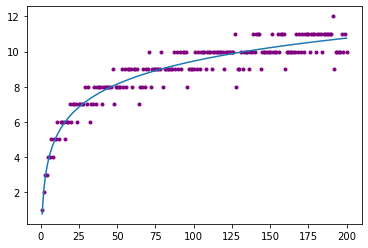

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def collectLens(n):
    result = []
    for i in range(1,n):
        result.append(len(fragmentationVI(i)))
    return result

n = 201
lens = collectLens(n) # длины цепочек полученные методом ДВИ
x = [i for i in range(1, n)] # ость Х
lnX = [np.log(i) for i in range(1, n)] # Координаты логарифма
lnXPow = [np.log(i) ** 2 for i in range(1, n)] # возведение логарифма в квадрат
lensMultlnX = [lens[i - 1] * lnX[i - 1] for i in range(1, n)]
coefB = (n * sum(lensMultlnX) - sum(lens) * sum(lnX)) / (n * sum(lnXPow) - sum(lnX) * sum(lnX)) # коэфициент b
coefA = (sum(lens) - coefB * sum(lnX)) / (n - 1) # коэфициент a
y = [coefA + coefB * lnX[i - 1] for i in range(1, n)] # график
plt.scatter(x, lens, color ='purple', marker ='.') 
plt.plot(x, y)
plt.show()

#### Вывод
Из графика видно, что функция $l(n)$ апроксимируется логарифмической кривой. Это подтверждает следствие теоремы Брауэра $\lim\limits_{x\to\infty} \cfrac{l(n)}{\lambda(n)} = 1$. С увеличением $n,\ l(n)$  будет увеличиваться как логарифмическая функция. Поэтому $l(n)$ и $\lambda(n)$ будут эквивалентны на бесконечности.

### Проверка гипотезы Шольца-Брауэра

In [ ]:
for n in range (1,12):
    left = fragmentationVI(2**n-1)
    right = fragmentationVI(n)
    if len(left) <= len(right)+n-1:
        print("Гипотеза верна для n = {}: {} <= {}+{}-1".format(n ,len(left), len(right),n))
    else:
        print("Гипотеза неверна для n = {}: {} > {}+{}-1".format(n, len(left), len(right),n))

Гипотеза верна для n = 1: 1 <= 1+1-1
Гипотеза верна для n = 2: 3 <= 2+2-1
Гипотеза верна для n = 3: 5 <= 3+3-1
Гипотеза верна для n = 4: 6 <= 3+4-1
Гипотеза верна для n = 5: 8 <= 4+5-1
Гипотеза верна для n = 6: 9 <= 4+6-1
Гипотеза верна для n = 7: 11 <= 5+7-1
Гипотеза верна для n = 8: 11 <= 4+8-1
Гипотеза верна для n = 9: 13 <= 5+9-1
Гипотеза верна для n = 10: 14 <= 5+10-1


В таблице приведены значения $l^*(2^n-1)$ и $l^*(n) + n - 1$ для $n \in [1, 10]$

| $n$ | $l^*(2^n-1)$ | $l^*(n) + n - 1$ |
| :-: | :-: | :-: |
| 1 | 1 | 1 |
| 2 | 3 | 3 |
| 3 | 5 | 5 |
| 4 | 6 | 6 |
| 5 | 8 | 8 |
| 6 | 9 | 9 |
| 7 | 11 | 11 |
| 8 | 11 | 11 |
| 9 | 13 | 13 |
| 10 | 14 | 14 |

#### Вывод
Из полученных данных видно что, гипотеза Шольца-Брауэра справедлива для $n \leq 10$.

## Вывод по практической работе
1. Сформировано представление о аддитивных цепочках.

2. Реализованы и применены следующие алгоритмы составления аддитивных цепочек:
    - Бинарный метод
    - Метод множителей
    - Алгоритм Брауера
    - Алгоритм дробления вектора индексов

3. Проверено следствие теоремы Брауэра $\lim\limits_{x\to\infty} \cfrac{l(n)}{\lambda(n)} = 1$ на $n=1..200$. 

4. Была проверена гипотеза Шольца-Брауэра $l^*(2^n-1)\leqslant l^*(n)+n-1$ на $n \in [1, 10]$. 